In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("SML2010.txt", delimiter=' ')

In [3]:
dataset

,#,Unnamed: 1,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,...,95436.800,758.88000,0,0,0,18.1150,48.3750,2.00000,NaN,NaN
1,13/03/2012,12:00,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,...,95436.800,762.06900,0,0,0,18.4147,47.8080,2.00000,NaN,NaN
2,13/03/2012,12:15,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,...,95398.600,766.25100,0,0,0,18.8533,47.4320,2.00000,NaN,NaN
3,13/03/2012,12:30,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,...,95360.300,766.03700,0,0,0,19.2907,47.0240,2.00000,NaN,NaN
4,13/03/2012,12:45,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,...,95354.900,762.74300,0,0,0,19.7400,45.4743,2.00000,NaN,NaN
5,13/03/2012,13:00,19.6407,19.2773,20.0000,218.389,216.011,39.8107,42.0347,81.2427,...,95354.900,752.68300,0,0,0,20.1660,45.5467,2.00000,NaN,NaN
6,13/03/2012,13:15,19.9120,19.5367,20.0000,218.155,215.829,39.8613,41.9947,81.3600,...,95354.900,740.94900,0,0,0,20.5660,44.9680,2.00000,NaN,NaN
7,13/03/2012,13:30,20.1640,19.7307,20.0000,216.661,215.296,39.8240,41.9947,81.0240,...,95174.700,721.10900,0,0,0,20.8427,45.1813,2.00000,NaN,NaN
8,13/03/2012,13:45,20.4120,19.9693,20.0000,217.461,214.549,39.9587,42.1253,81.1040,...,91848.700,699.39200,0,0,0,21.2040,45.4160,2.00000,NaN,NaN
9,13/03/2012,14:00,20.6400,20.1407,20.0000,215.349,213.909,39.9400,42.0427,81.1813,...,87217.500,677.67500,0,0,0,21.5227,45.0213,2.00000,NaN,NaN


In [4]:
rows = 2764
training_set = dataset.iloc[:, [4, 7, 9, 17, 22]].values

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
training_set = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []

for i in range(210, rows):
    X_train.append(training_set[i-210:i, :])
    y_train.append(training_set[i, :])
    
X_train, y_train = np.array(X_train), np.array(y_train)    

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [9]:
regressor = Sequential()

regressor.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(85, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.17))

regressor.add(LSTM(85, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.17))

regressor.add(Dense(X_train.shape[2]))

regressor.compile('adam', loss='mean_squared_error')

In [10]:
regressor.fit(X_train, y_train, batch_size=36, epochs=25)

Epoch 1/25
2554/2554 [==============================] - 31s 12ms/step - loss: 0.0341
Epoch 2/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0104
Epoch 3/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0085
Epoch 4/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0075
Epoch 5/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0072
Epoch 6/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0068
Epoch 7/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0063
Epoch 8/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0061
Epoch 9/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0059
Epoch 10/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0057
Epoch 11/25
2554/2554 [==============================] - 30s 12ms/step - loss: 0.0053
Epoch 12/25
2554/2554 [==============================] - 30s 12

In [11]:
inputs = dataset[:240]
inputs = inputs.iloc[:, [4, 7, 9, 17, 22]].values
real = inputs
inputs = sc.transform(inputs)

In [12]:
X_test = []

for i in range(210, 230):
    X_test.append(inputs[i-210:i])
 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

prediction = regressor.predict(X_test)
prediction = sc.inverse_transform(prediction)

In [13]:
real_temperature = real[:20, 0]
predicted_temperature = prediction[:20, 0]

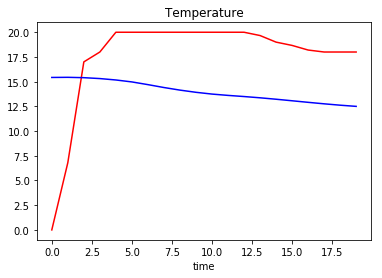

In [14]:
plt.plot(real_temperature, color='red')
plt.plot(predicted_temperature, color='blue')
plt.title("Temperature")
plt.xlabel("time")
plt.show()

In [15]:
real_CO2 = real[:20, 1]
predicted_CO2 = prediction[:20, 1]

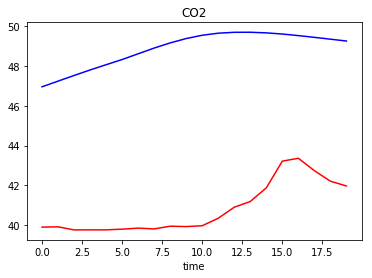

In [16]:
plt.plot(real_CO2, color='red')
plt.plot(predicted_CO2, color='blue')
plt.title("CO2")
plt.xlabel("time")
plt.show()

In [17]:
real_humedad = real[:20, 2]
predicted_humedad = prediction[:20, 2]

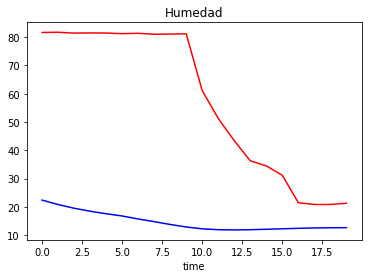

In [18]:
plt.plot(real_humedad, color='red')
plt.plot(predicted_humedad, color='blue')
plt.title("Humedad")
plt.xlabel("time")
plt.show()

In [19]:
real_est = real[:20, 3]
predicted_est = prediction[:20, 3]

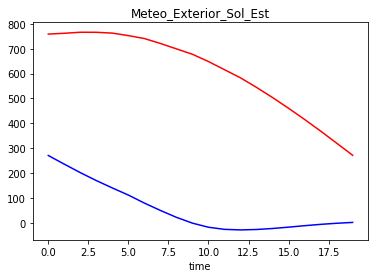

In [20]:
plt.plot(real_est, color='red')
plt.plot(predicted_est, color='blue')
plt.title("Meteo_Exterior_Sol_Est")
plt.xlabel("time")
plt.show()

In [21]:
real_turbo = real[:20, 4]
predicted_turbo = prediction[:20, 4]

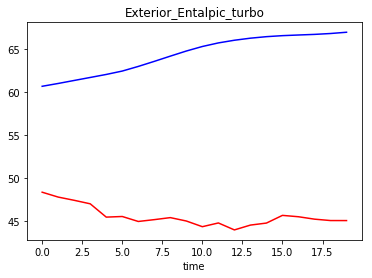

In [22]:
plt.plot(real_turbo, color='red')
plt.plot(predicted_turbo, color='blue')
plt.title("Exterior_Entalpic_turbo")
plt.xlabel("time")
plt.show()